In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['font.family'] = 'Malgun Gothic'

In [2]:
data = pd.read_csv("./Raemian_final.csv")

In [3]:
data

,계약년월,건축년도,매칭 구,건설수주_건축(단위 백만원),건설수주_주택(단위 백만원),매매가격지수(아파트),경상수지(백만불),무역수지(백만불),대출금액(아파트)(억원),대출잔액(아파트)(억원),...,NASDAQ_change_rate,DOW Jones_close,DOW Jones_change_rate,KRX300_close,KRX300_change_rate,KOSPI_close,KOSPI_change_rate,KOSDAQ_close,KOSDAQ_change_rate,평당가
0,202101,2020,강남구,"10,589,107","6,436,523",97.0,"5,762","3,550","25,979.03","22,748.79",...,0.044976,30821.35259,0.022315,1847.35,2.93,2976.21,3.58,928.73,-4.10,10829.091880
1,202105,2020,강남구,"11,699,841","5,568,538",99.0,"11,307","2,814","21,924.71","19,920.09",...,-0.027352,34270.30859,0.013816,1932.64,1.04,3203.92,1.78,981.78,-0.17,10932.076100
2,202105,2020,강남구,"11,699,841","5,568,538",99.0,"11,307","2,814","21,924.71","19,920.09",...,-0.027352,34270.30859,0.013816,1932.64,1.04,3203.92,1.78,981.78,-0.17,11899.038460
3,202105,2020,강남구,"11,699,841","5,568,538",99.0,"11,307","2,814","21,924.71","19,920.09",...,-0.027352,34270.30859,0.013816,1932.64,1.04,3203.92,1.78,981.78,-0.17,10932.076100
4,202105,2020,강남구,"11,699,841","5,568,538",99.0,"11,307","2,814","21,924.71","19,920.09",...,-0.027352,34270.30859,0.013816,1932.64,1.04,3203.92,1.78,981.78,-0.17,11899.038460
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7857,202011,2011,중구,"13,510,590","8,663,124",96.4,"9,619","5,807","26,045.45","22,428.73",...,0.031414,29124.03662,0.039955,1593.06,14.43,2591.34,14.30,886.11,11.79,5744.894543
7858,202012,2011,중구,"22,231,493","15,138,239",96.6,"12,063","6,694","34,654.82","29,943.84",...,0.069913,30148.57990,0.035179,1794.81,12.66,2873.47,10.89,968.42,9.29,5634.415802
7859,202012,2011,중구,"22,231,493","15,138,239",96.6,"12,063","6,694","34,654.82","29,943.84",...,0.069913,30148.57990,0.035179,1794.81,12.66,2873.47,10.89,968.42,9.29,5855.373284
7860,202012,2011,중구,"22,231,493","15,138,239",96.6,"12,063","6,694","34,654.82","29,943.84",...,0.069913,30148.57990,0.035179,1794.81,12.66,2873.47,10.89,968.42,9.29,4970.581313


In [4]:
print(data["매칭 구"].unique())

['강남구' '강동구' '강북구' '광진구' '구로구' '노원구' '동대문구' '동작구' '마포구' '서대문구' '서초구' '성동구'
 '성북구' '송파구' '양천구' '영등포구' '용산구' '은평구' '중구']


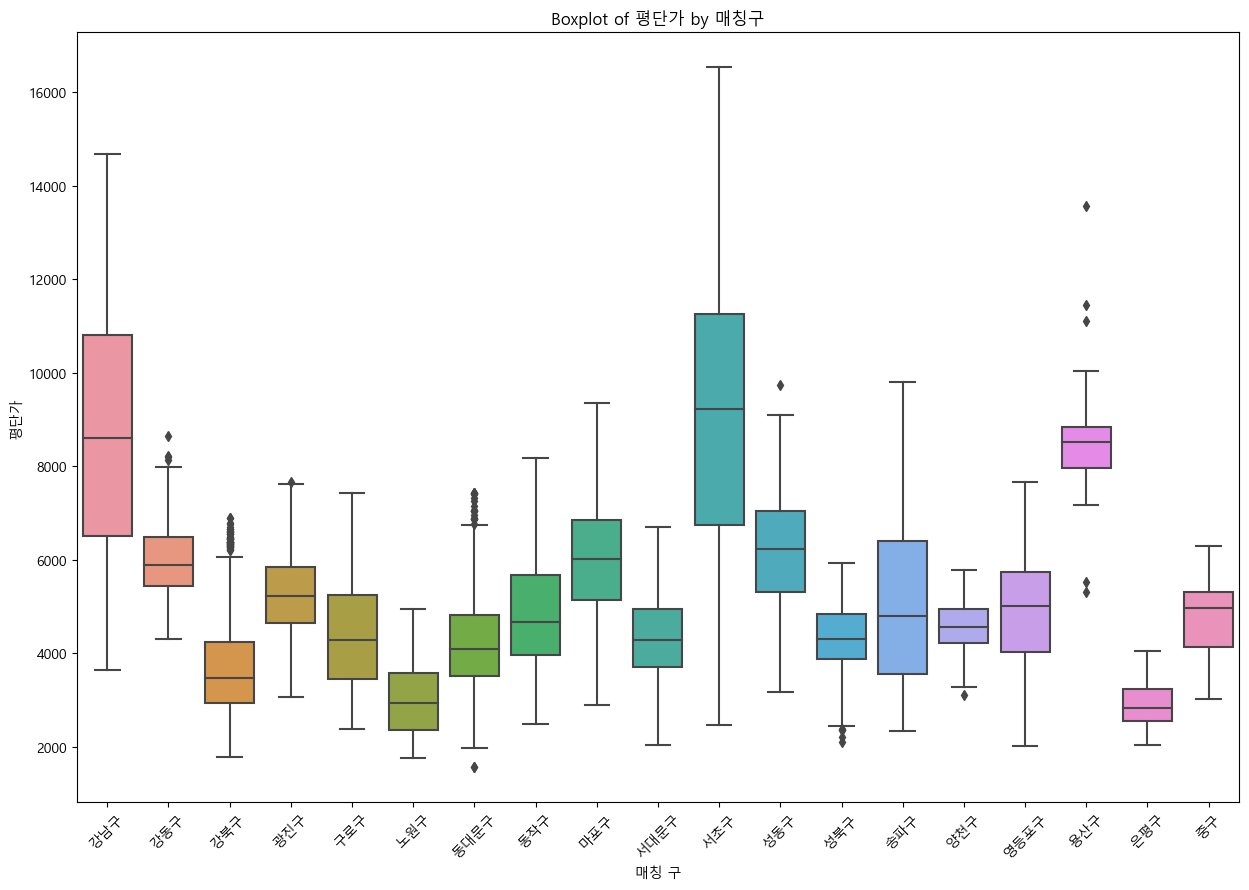

매칭 구
강남구     8643.719014
강동구     5995.370427
강북구     3555.823716
광진구     5312.396082
구로구     4439.677902
노원구     3028.160039
동대문구    4196.714011
동작구     4883.203924
마포구     5995.213980
서대문구    4354.542559
서초구     8802.682454
성동구     6204.758752
성북구     4333.656900
송파구     5038.167361
양천구     4603.582286
영등포구    4958.265987
용산구     8481.974811
은평구     2914.569622
중구      4775.975229
Name: 평당가, dtype: float64

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Converting '평단가' to numeric (as it seems to be a string)
data['평당가'] = pd.to_numeric(data['평당가'], errors='coerce')

# Grouping data by '매칭구'
grouped_data = data.groupby('매칭 구')

# Creating boxplots for each group's '평단가' to visualize outliers
plt.figure(figsize=(15,10))
sns.boxplot(x='매칭 구', y='평당가', data=data)
plt.xticks(rotation=45)
plt.title('Boxplot of 평단가 by 매칭구')
plt.ylabel('평단가')
plt.xlabel('매칭 구')
plt.show()

# Identifying and removing outliers for each group in '평단가'
# Using IQR (Interquartile Range) method
cleaned_data = pd.DataFrame()
for name, group in grouped_data:
    Q1 = group['평당가'].quantile(0.25)
    Q3 = group['평당가'].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    filtered_group = group[(group['평당가'] >= lower_bound) & (group['평당가'] <= upper_bound)]
    cleaned_data = pd.concat([cleaned_data, filtered_group], axis=0)

# Calculating the mean of '평단가' for each group in the cleaned data
mean_prices = cleaned_data.groupby('매칭 구')['평당가'].mean()
mean_prices


##이상치를 제거한, 0.25~0.75만 확인해보기!

하위 25% :  6506.4915492499995
상위 25% :  10805.353935
강남구 평균 평당가:  8643.719014115162
강남구 전체 개수 : 686
강남구 필터링 개수 686
이상치 개수(제거) : 0


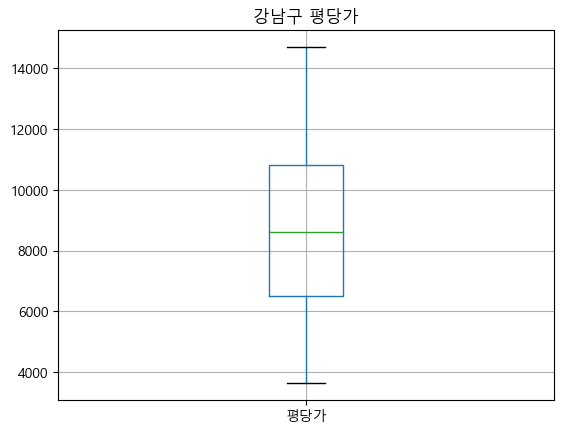

하위 25% :  5441.696113
상위 25% :  6496.4663825
강동구 평균 평당가:  6018.671145381313
강동구 전체 개수 : 396
강동구 필터링 개수 392
이상치 개수(제거) : 4


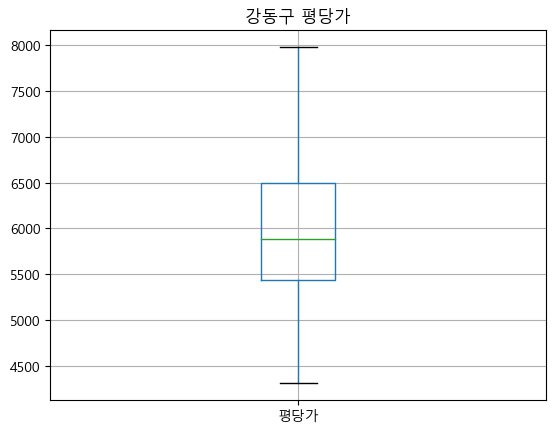

하위 25% :  2932.8105195
상위 25% :  4242.7222255
강북구 평균 평당가:  3721.8485066925878
강북구 전체 개수 : 823
강북구 필터링 개수 776
이상치 개수(제거) : 47


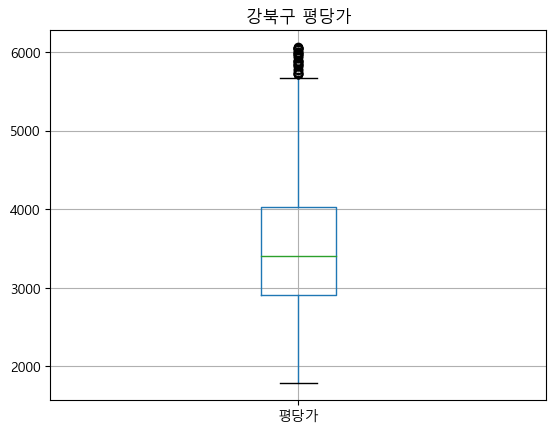

하위 25% :  4645.63025925
상위 25% :  5857.3948224999995
광진구 평균 평당가:  5319.733542807454
광진구 전체 개수 : 322
광진구 필터링 개수 321
이상치 개수(제거) : 1


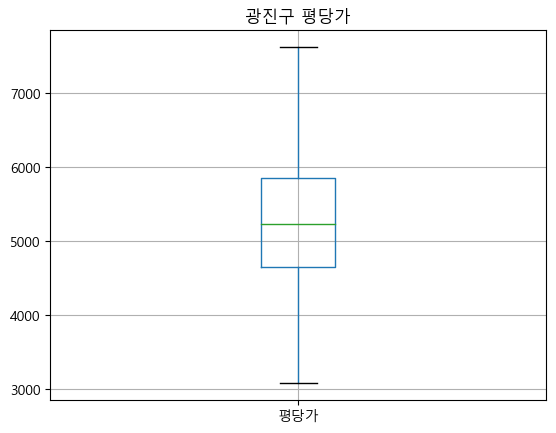

하위 25% :  3448.56917325
상위 25% :  5242.409979
구로구 평균 평당가:  4439.677901950414
구로구 전체 개수 : 242
구로구 필터링 개수 242
이상치 개수(제거) : 0


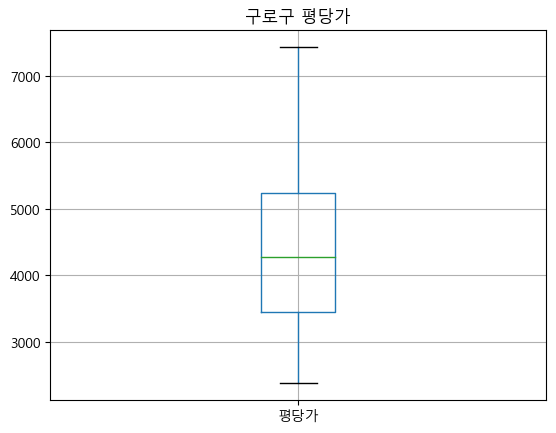

하위 25% :  2355.530026
상위 25% :  3580.681783
노원구 평균 평당가:  3028.1600392222217
노원구 전체 개수 : 135
노원구 필터링 개수 135
이상치 개수(제거) : 0


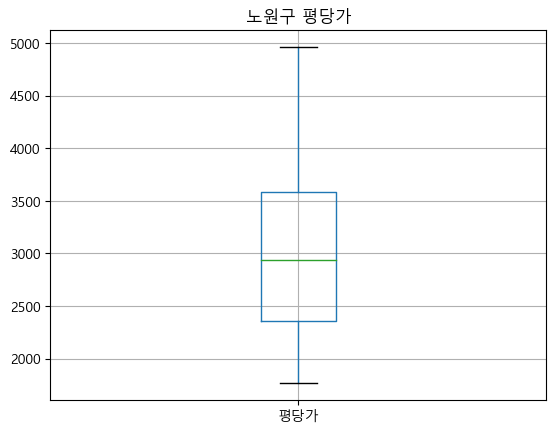

하위 25% :  3527.87913775
상위 25% :  4820.692355499999
동대문구 평균 평당가:  4254.6063409524395
동대문구 전체 개수 : 820
동대문구 필터링 개수 800
이상치 개수(제거) : 20


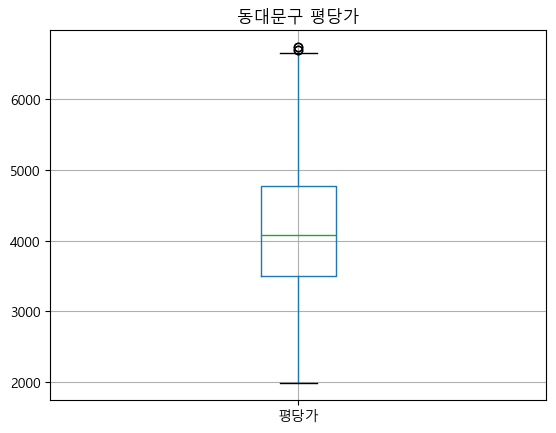

하위 25% :  3975.7832945
상위 25% :  5669.56931
동작구 평균 평당가:  4883.203923665871
동작구 전체 개수 : 419
동작구 필터링 개수 419
이상치 개수(제거) : 0


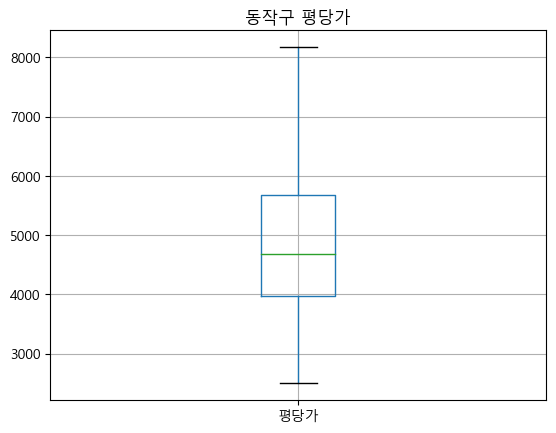

하위 25% :  5146.78688375
상위 25% :  6843.4445157499995
마포구 평균 평당가:  5995.21397973
마포구 전체 개수 : 1100
마포구 필터링 개수 1100
이상치 개수(제거) : 0


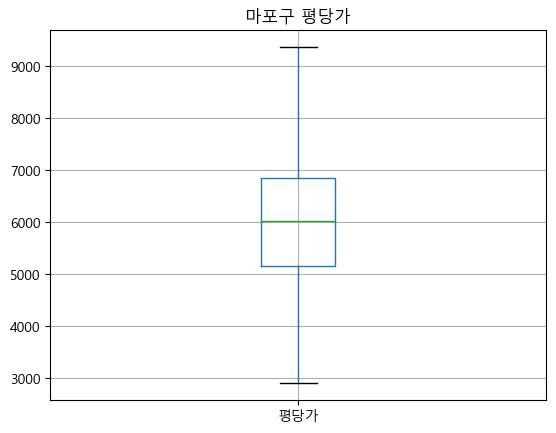

하위 25% :  3716.836309
상위 25% :  4957.9781570000005
서대문구 평균 평당가:  4354.5425593159725
서대문구 전체 개수 : 576
서대문구 필터링 개수 576
이상치 개수(제거) : 0


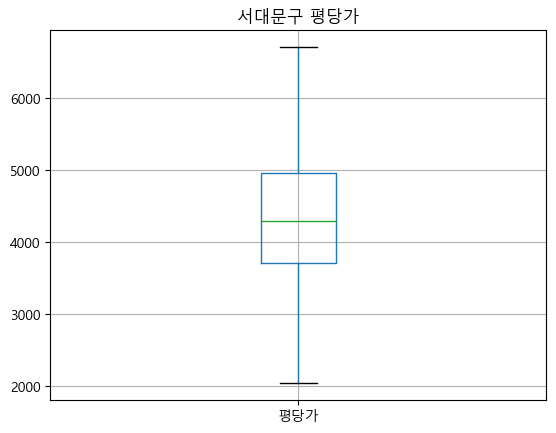

하위 25% :  6751.2007995
상위 25% :  11248.7917325
서초구 평균 평당가:  8802.68245402669
서초구 전체 개수 : 562
서초구 필터링 개수 562
이상치 개수(제거) : 0


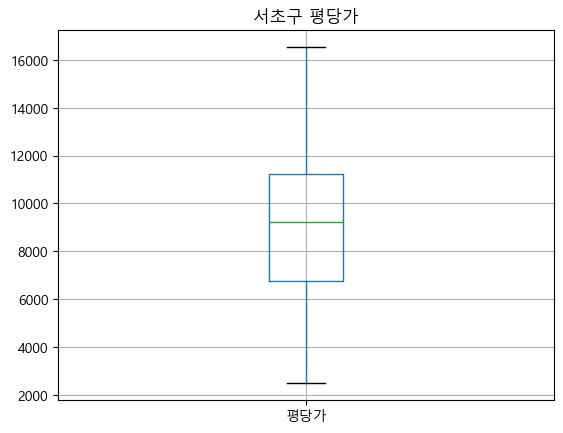

하위 25% :  5314.387211
상위 25% :  7041.173529
성동구 평균 평당가:  6220.226335423582
성동구 전체 개수 : 229
성동구 필터링 개수 228
이상치 개수(제거) : 1


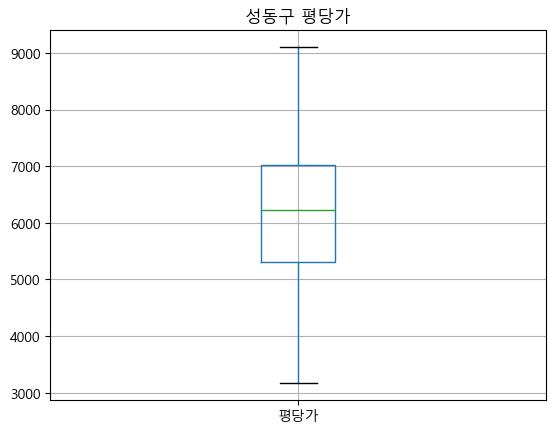

하위 25% :  3871.138882
상위 25% :  4847.270906
성북구 평균 평당가:  4319.467225574203
성북구 전체 개수 : 721
성북구 필터링 개수 716
이상치 개수(제거) : 5


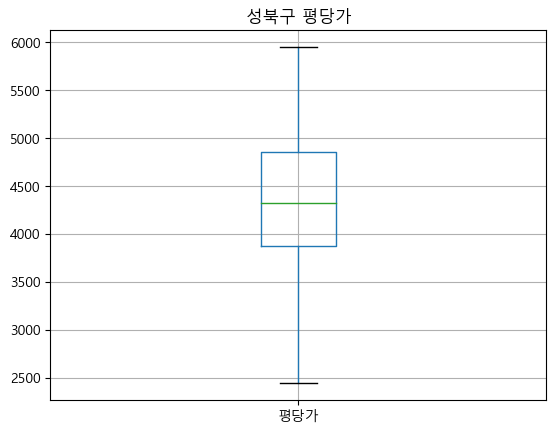

하위 25% :  3562.993454
상위 25% :  6413.957718
송파구 평균 평당가:  5038.167361187739
송파구 전체 개수 : 261
송파구 필터링 개수 261
이상치 개수(제거) : 0


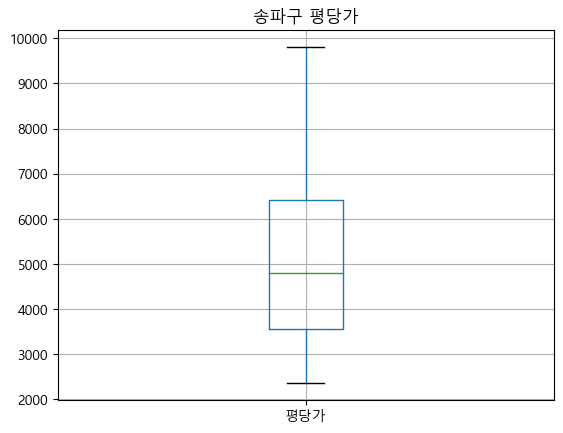

하위 25% :  4029.96349
상위 25% :  5751.12604175
영등포구 평균 평당가:  4958.2659869430045
영등포구 전체 개수 : 386
영등포구 필터링 개수 386
이상치 개수(제거) : 0


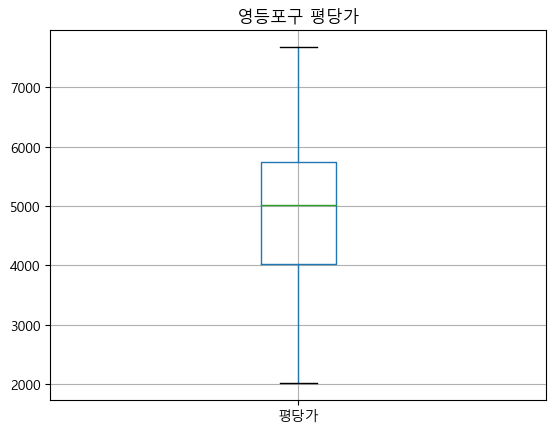

하위 25% :  7959.861993750001
상위 25% :  8837.100121
용산구 평균 평당가:  8595.531619124999
용산구 전체 개수 : 40
용산구 필터링 개수 35
이상치 개수(제거) : 5


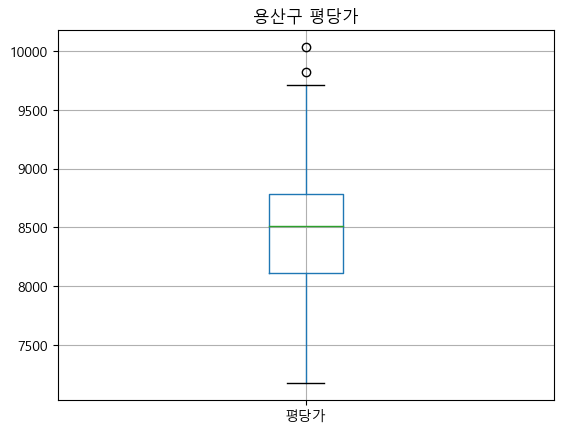

하위 25% :  2560.65895575
상위 25% :  3243.01626575
은평구 평균 평당가:  2914.569621552632
은평구 전체 개수 : 38
은평구 필터링 개수 38
이상치 개수(제거) : 0


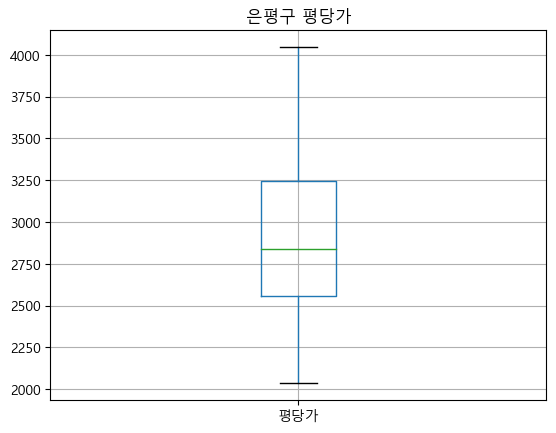

하위 25% :  4229.76964
상위 25% :  4945.747017
양천구 평균 평당가:  4565.591307564103
양천구 전체 개수 : 39
양천구 필터링 개수 38
이상치 개수(제거) : 1


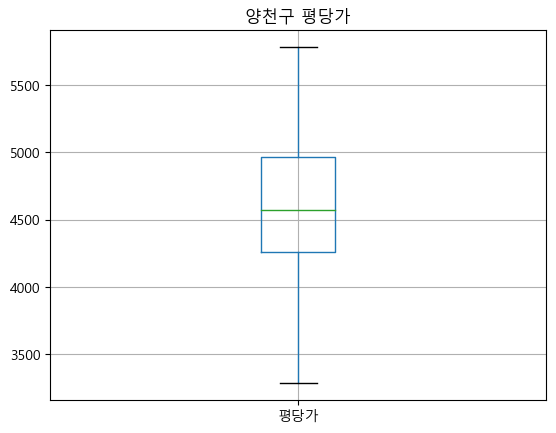

하위 25% :  4132.281982
상위 25% :  5320.075312
중구 평균 평당가:  4775.975228985075
중구 전체 개수 : 67
중구 필터링 개수 67
이상치 개수(제거) : 0


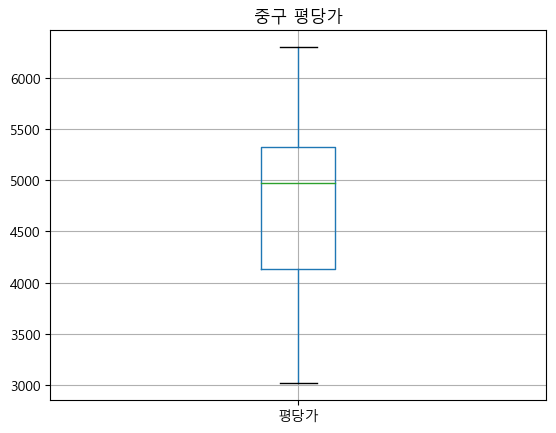

---------------------------------------
전체 시각화


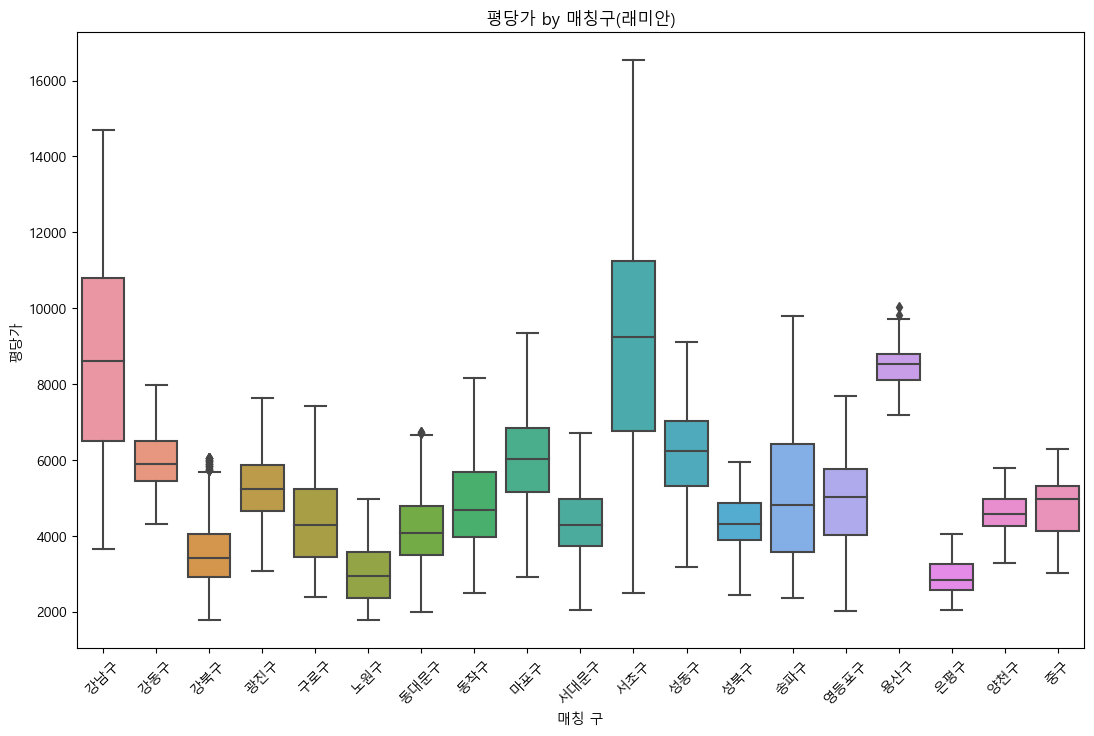

In [6]:
'''
매칭구, 각 구별 총 개수, 각 구별 이상치 개수, 각 구별 시각화, 각 구별 평단가, 전체 시각화
'''
filtered_data_total = pd.DataFrame()
def visualize(data, group):
    data = data[data['매칭 구'] == group]
    # low_limit = data["평당가"].quantile(0.25)
    # upper_limit = data['평당가'].quantile(0.75)

    Q1 = data["평당가"].quantile(0.25)
    Q3 = data["평당가"].quantile(0.75)
    IQR = Q3 - Q1
    

    # filtered_data = data[(data["평당가"] >= low_limit) & (data["평당가"] <= upper_limit)] #형준 수식(무작정 지우는 것)
    filtered_data = data[~((data['평당가'] < (Q1 - 1.5 * IQR)) | (data['평당가'] > (Q3 + 1.5 * IQR)))] #희진 수식
    #튀어나오는 값 있지만, 정상 범위내에 있다고 판단.
    global filtered_data_total
    filtered_data_total = pd.concat([filtered_data_total, filtered_data], ignore_index=True)
    
    outliers_count = len(data) - len(filtered_data)

    filtered_data_total.append(data, ignore_index=True)
    
    print("하위 25% : ", Q1)
    print("상위 25% : ", Q3)
    print(f"{group} 평균 평당가: ", data['평당가'].mean())
    print(f"{group} 전체 개수 :", len(data))
    print(f"{group} 필터링 개수", len(filtered_data))
    print("이상치 개수(제거) :", outliers_count) #이미 정수 개수




    #개별 box plot 그리기
    filtered_data.boxplot(column = "평당가")
    plt.title(f"{group} 평당가") #0.25~0.75% 사이 1차 필터링
    plt.show()

group = ['강남구', '강동구', '강북구', '광진구', '구로구', '노원구', '동대문구', '동작구', '마포구', '서대문구', '서초구', '성동구', '성북구', '송파구', '영등포구', '용산구', '은평구', '양천구', '중구']

for i in group:
    visualize(data, i)

print("---------------------------------------")
print("전체 시각화")


plt.figure(figsize=(13,8))
sns.boxplot(x="매칭 구", y="평당가", data=filtered_data_total)
plt.xticks(rotation = 45)
plt.title("평당가 by 매칭구(래미안)")
plt.ylabel("평당가")
plt.xlabel("매칭 구")
plt.show()



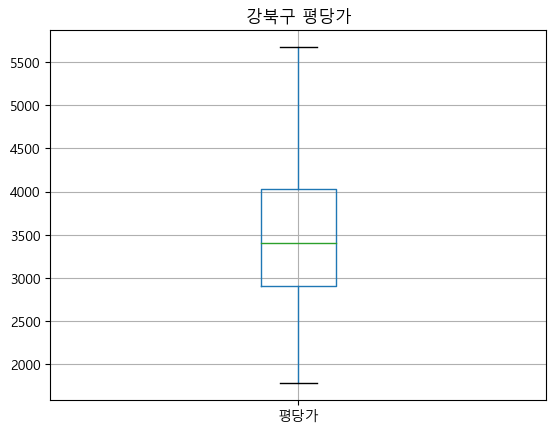

In [7]:
#데이터 문제 없이 이상치 제거
group_data = filtered_data_total[filtered_data_total["매칭 구"] == "강북구"]

group_data.boxplot(column = "평당가", showfliers=False)
plt.title("강북구 평당가")
plt.show()

# group_data.to_csv("./강북구.csv")

##filtered_data_total = data로 다시 수정해주기

In [8]:
data = filtered_data_total

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7778 entries, 0 to 7777
Data columns (total 42 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   계약년월                                7778 non-null   int64  
 1   건축년도                                7778 non-null   int64  
 2   매칭 구                                7778 non-null   object 
 3   건설수주_건축(단위 백만원)                     7778 non-null   object 
 4   건설수주_주택(단위 백만원)                     7778 non-null   object 
 5   매매가격지수(아파트)                         7778 non-null   float64
 6   경상수지(백만불)                           7778 non-null   object 
 7   무역수지(백만불)                           7778 non-null   object 
 8   대출금액(아파트)(억원)                       7778 non-null   object 
 9   대출잔액(아파트)(억원)                       7778 non-null   object 
 10  서울_신규_분양세대(단위: 세대)                  7778 non-null   object 
 11  아파트 동(호)수_(단위: 호)                   7778 no

In [10]:
# object -> float 형으로 데이터타입 변환
# transaction_fee = data['거래금액(만원)']
CO_architecture = data['건설수주_건축(단위 백만원)']
CO_dwellinghouse = data['건설수주_주택(단위 백만원)']
current_balance = data['경상수지(백만불)']
trade_balance = data['무역수지(백만불)']
loan_amount = data['대출금액(아파트)(억원)']
loan_balance = data['대출잔액(아파트)(억원)']
Newly_Offered_Housing_Units_in_Seoul = data['서울_신규_분양세대(단위: 세대)']
employed_person = data['경제활동인구_취업자(단위: 천명)']
KOSPI = data['국제 주요국 주가지수(KOSPI)']
KRW_to_USD = data['원화의 대미달러, 원화의 대위안/대엔 환율(원/달러(종가)_원']

# transaction_fee_comma_removed = transaction_fee.apply(lambda x: x.replace(',', ''))
# data['거래금액(만원)'] = transaction_fee_comma_removed.astype(float)
CO_architecture_comma_removed = CO_architecture.apply(lambda x: x.replace(',', ''))
data['건설수주_건축(단위 백만원)'] = CO_architecture_comma_removed.astype(float)
CO_dwellinghouse_comma_removed = CO_dwellinghouse.apply(lambda x: x.replace(',', ''))
data['건설수주_주택(단위 백만원)'] = CO_dwellinghouse_comma_removed.astype(float)
current_balance_comma_removed = current_balance.apply(lambda x: x.replace(',', ''))
data['경상수지(백만불)'] = current_balance_comma_removed.astype(float)
trade_balance_comma_removed = trade_balance.apply(lambda x: x.replace(',', ''))
data['무역수지(백만불)'] = trade_balance_comma_removed.astype(float)
loan_amount_comma_removed = loan_amount.apply(lambda x: x.replace(',', ''))
data['대출금액(아파트)(억원)'] = loan_amount_comma_removed.astype(float)
loan_balance_comma_removed = loan_balance.apply(lambda x: x.replace(',', ''))
data['대출잔액(아파트)(억원)'] = loan_balance_comma_removed.astype(float)
Newly_Offered_Housing_Units_in_Seoul_comma_removed = Newly_Offered_Housing_Units_in_Seoul.apply(lambda x: x.replace(',', ''))
data['서울_신규_분양세대(단위: 세대)'] = Newly_Offered_Housing_Units_in_Seoul_comma_removed.astype(float)
employed_person_comma_removed = employed_person.apply(lambda x: x.replace(',', ''))
data['경제활동인구_취업자(단위: 천명)'] = employed_person_comma_removed.astype(float)
KOSPI_comma_removed = KOSPI.apply(lambda x: x.replace(',', ''))
data['국제 주요국 주가지수(KOSPI)'] = KOSPI_comma_removed.astype(float)
KRW_to_USD_comma_removed = KRW_to_USD.apply(lambda x: x.replace(',', ''))
data['원화의 대미달러, 원화의 대위안/대엔 환율(원/달러(종가)_원'] = KRW_to_USD_comma_removed.astype(float)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7778 entries, 0 to 7777
Data columns (total 42 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   계약년월                                7778 non-null   int64  
 1   건축년도                                7778 non-null   int64  
 2   매칭 구                                7778 non-null   object 
 3   건설수주_건축(단위 백만원)                     7778 non-null   float64
 4   건설수주_주택(단위 백만원)                     7778 non-null   float64
 5   매매가격지수(아파트)                         7778 non-null   float64
 6   경상수지(백만불)                           7778 non-null   float64
 7   무역수지(백만불)                           7778 non-null   float64
 8   대출금액(아파트)(억원)                       7778 non-null   float64
 9   대출잔액(아파트)(억원)                       7778 non-null   float64
 10  서울_신규_분양세대(단위: 세대)                  7778 non-null   float64
 11  아파트 동(호)수_(단위: 호)                   7778 no

# 정규화

In [12]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer, make_column_transformer

ohe = OneHotEncoder(sparse=False)

data_apt_name = ohe.fit_transform(data[['매칭 구']])
#data_road_name = ohe.fit_transform(data[['도로명']])
#data_matching_gu = ohe.fit_transform(data[['매칭 구']])

In [13]:
data_apt_name

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [14]:
ohe.categories_

[array(['강남구', '강동구', '강북구', '광진구', '구로구', '노원구', '동대문구', '동작구', '마포구',
        '서대문구', '서초구', '성동구', '성북구', '송파구', '양천구', '영등포구', '용산구', '은평구',
        '중구'], dtype=object)]

In [15]:
df_apt_name = pd.DataFrame(data_apt_name, columns=[col for col in ohe.categories_[0]])

In [16]:
data = pd.concat([data.drop(columns=['매칭 구']), df_apt_name], axis=1)

In [17]:
data

,계약년월,건축년도,건설수주_건축(단위 백만원),건설수주_주택(단위 백만원),매매가격지수(아파트),경상수지(백만불),무역수지(백만불),대출금액(아파트)(억원),대출잔액(아파트)(억원),서울_신규_분양세대(단위: 세대),...,서대문구,서초구,성동구,성북구,송파구,양천구,영등포구,용산구,은평구,중구
0,202101,2020,10589107.0,6436523.0,97.0,5762.0,3550.0,25979.03,22748.79,234.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,202105,2020,11699841.0,5568538.0,99.0,11307.0,2814.0,21924.71,19920.09,360.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,202105,2020,11699841.0,5568538.0,99.0,11307.0,2814.0,21924.71,19920.09,360.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,202105,2020,11699841.0,5568538.0,99.0,11307.0,2814.0,21924.71,19920.09,360.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,202105,2020,11699841.0,5568538.0,99.0,11307.0,2814.0,21924.71,19920.09,360.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7773,202011,2011,13510590.0,8663124.0,96.4,9619.0,5807.0,26045.45,22428.73,99.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
7774,202012,2011,22231493.0,15138239.0,96.6,12063.0,6694.0,34654.82,29943.84,1178.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
7775,202012,2011,22231493.0,15138239.0,96.6,12063.0,6694.0,34654.82,29943.84,1178.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
7776,202012,2011,22231493.0,15138239.0,96.6,12063.0,6694.0,34654.82,29943.84,1178.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [18]:
ohe.categories_

[array(['강남구', '강동구', '강북구', '광진구', '구로구', '노원구', '동대문구', '동작구', '마포구',
        '서대문구', '서초구', '성동구', '성북구', '송파구', '양천구', '영등포구', '용산구', '은평구',
        '중구'], dtype=object)]

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7778 entries, 0 to 7777
Data columns (total 60 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   계약년월                                7778 non-null   int64  
 1   건축년도                                7778 non-null   int64  
 2   건설수주_건축(단위 백만원)                     7778 non-null   float64
 3   건설수주_주택(단위 백만원)                     7778 non-null   float64
 4   매매가격지수(아파트)                         7778 non-null   float64
 5   경상수지(백만불)                           7778 non-null   float64
 6   무역수지(백만불)                           7778 non-null   float64
 7   대출금액(아파트)(억원)                       7778 non-null   float64
 8   대출잔액(아파트)(억원)                       7778 non-null   float64
 9   서울_신규_분양세대(단위: 세대)                  7778 non-null   float64
 10  아파트 동(호)수_(단위: 호)                   7778 non-null   int64  
 11  아파트 건물면적_(천)                        7672 no

In [20]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler() #
data_std = scaler.fit_transform(data)

In [21]:
data_std

array([[ 0.75657373,  1.68940801, -0.69036029, ..., -0.06723252,
        -0.07006826, -0.09321419],
       [ 0.81894395,  1.68940801, -0.38202375, ..., -0.06723252,
        -0.07006826, -0.09321419],
       [ 0.81894395,  1.68940801, -0.38202375, ..., -0.06723252,
        -0.07006826, -0.09321419],
       ...,
       [-0.63116371,  0.32033449,  2.54153241, ..., -0.06723252,
        -0.07006826, 10.72797988],
       [-0.63116371,  0.32033449,  2.54153241, ..., -0.06723252,
        -0.07006826, 10.72797988],
       [-0.63116371,  0.32033449,  2.54153241, ..., -0.06723252,
        -0.07006826, 10.72797988]])

In [22]:
pd.set_option('display.max_columns', None)  # 모든 열을 출력하도록 설정
pd.set_option('display.expand_frame_repr', False)  # 너비 제한 없이 출력
print(data.head(10))

     계약년월  건축년도  건설수주_건축(단위 백만원)  건설수주_주택(단위 백만원)  매매가격지수(아파트)  경상수지(백만불)  무역수지(백만불)  대출금액(아파트)(억원)  대출잔액(아파트)(억원)  서울_신규_분양세대(단위: 세대)  아파트 동(호)수_(단위: 호)  아파트 건물면적_(천)  생산자물가지수 총지수   전규모(1인이상) 전체임금총액[원]  소비자물가지수 총지수   소비자물가지수 주택, 수도, 전기 및 연료  가계대출 (연리%)  경기종합지수(2020=100)  경제활동인구_ 실업률(단위: %)  경제활동인구_고용률(단위: %)  경제활동인구_취업자(단위: 천명)  국제 주요국 주가지수(KOSPI)  예금은행 대출금리(신규취급액 기준)_대출평균(연%)  예금은행 대출금리(잔액 기준)_총대출(연리%)  주택매매가격지수(KB)_서울  소비자물가지수_총지수(가중치:1000?)  원화의 대미달러, 원화의 대위안/대엔 환율(원/달러(종가)_원  경기종합지수  S&P 500_close  S&P 500_change_rate  NASDAQ_close  NASDAQ_change_rate  DOW Jones_close  DOW Jones_change_rate  KRX300_close  KRX300_change_rate  KOSPI_close  KOSPI_change_rate  KOSDAQ_close  KOSDAQ_change_rate          평당가  강남구  강동구  강북구  광진구  구로구  노원구  동대문구  동작구  마포구  서대문구  서초구  성동구  성북구  송파구  양천구  영등포구  용산구  은평구   중구
0  202101  2020       10589107.0        6436523.0         97.0     5762.0     3550.0       25979.03       22748.79               234.0               5945      443606.1        105.05     

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7778 entries, 0 to 7777
Data columns (total 60 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   계약년월                                7778 non-null   int64  
 1   건축년도                                7778 non-null   int64  
 2   건설수주_건축(단위 백만원)                     7778 non-null   float64
 3   건설수주_주택(단위 백만원)                     7778 non-null   float64
 4   매매가격지수(아파트)                         7778 non-null   float64
 5   경상수지(백만불)                           7778 non-null   float64
 6   무역수지(백만불)                           7778 non-null   float64
 7   대출금액(아파트)(억원)                       7778 non-null   float64
 8   대출잔액(아파트)(억원)                       7778 non-null   float64
 9   서울_신규_분양세대(단위: 세대)                  7778 non-null   float64
 10  아파트 동(호)수_(단위: 호)                   7778 non-null   int64  
 11  아파트 건물면적_(천)                        7672 no

In [24]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
#데이터 스케일러
scaled_data = scaler.fit_transform(data)
scaled_df = pd.DataFrame(scaled_data, columns=data.columns)

print(scaled_df)

          계약년월      건축년도  건설수주_건축(단위 백만원)  건설수주_주택(단위 백만원)  매매가격지수(아파트)  경상수지(백만불)  무역수지(백만불)  대출금액(아파트)(억원)  대출잔액(아파트)(억원)  서울_신규_분양세대(단위: 세대)  아파트 동(호)수_(단위: 호)  아파트 건물면적_(천)  생산자물가지수 총지수   전규모(1인이상) 전체임금총액[원]  소비자물가지수 총지수   소비자물가지수 주택, 수도, 전기 및 연료  가계대출 (연리%)  경기종합지수(2020=100)  경제활동인구_ 실업률(단위: %)  경제활동인구_고용률(단위: %)  경제활동인구_취업자(단위: 천명)  국제 주요국 주가지수(KOSPI)  예금은행 대출금리(신규취급액 기준)_대출평균(연%)  예금은행 대출금리(잔액 기준)_총대출(연리%)  주택매매가격지수(KB)_서울  소비자물가지수_총지수(가중치:1000?)  원화의 대미달러, 원화의 대위안/대엔 환율(원/달러(종가)_원    경기종합지수  S&P 500_close  S&P 500_change_rate  NASDAQ_close  NASDAQ_change_rate  DOW Jones_close  DOW Jones_change_rate  KRX300_close  KRX300_change_rate  KOSPI_close  KOSPI_change_rate  KOSDAQ_close  KOSDAQ_change_rate       평당가       강남구       강동구       강북구       광진구     구로구       노원구      동대문구       동작구       마포구      서대문구       서초구       성동구       성북구       송파구       양천구      영등포구       용산구       은평구         중구
0     0.756574  1.689408        -0.690360        -0.675373    -0.074434  -0.311613   0.

In [25]:
heatmap_data = scaled_df.iloc[:, :41] #iloc로 진행하기

In [26]:
heatmap_data #계약년도 월별도 sacler해야하나? 

,계약년월,건축년도,건설수주_건축(단위 백만원),건설수주_주택(단위 백만원),매매가격지수(아파트),경상수지(백만불),무역수지(백만불),대출금액(아파트)(억원),대출잔액(아파트)(억원),서울_신규_분양세대(단위: 세대),아파트 동(호)수_(단위: 호),아파트 건물면적_(천),생산자물가지수 총지수,전규모(1인이상) 전체임금총액[원],소비자물가지수 총지수,"소비자물가지수 주택, 수도, 전기 및 연료",가계대출 (연리%),경기종합지수(2020=100),경제활동인구_ 실업률(단위: %),경제활동인구_고용률(단위: %),경제활동인구_취업자(단위: 천명),국제 주요국 주가지수(KOSPI),예금은행 대출금리(신규취급액 기준)_대출평균(연%),예금은행 대출금리(잔액 기준)_총대출(연리%),주택매매가격지수(KB)_서울,소비자물가지수_총지수(가중치:1000?),"원화의 대미달러, 원화의 대위안/대엔 환율(원/달러(종가)_원",경기종합지수,S&P 500_close,S&P 500_change_rate,NASDAQ_close,NASDAQ_change_rate,DOW Jones_close,DOW Jones_change_rate,KRX300_close,KRX300_change_rate,KOSPI_close,KOSPI_change_rate,KOSDAQ_close,KOSDAQ_change_rate,평당가
0,0.756574,1.689408,-0.690360,-0.675373,-0.074434,-0.311613,0.189604,0.234363,0.387647,-0.385680,-0.308012,-0.344602,-0.207226,1.009287,-0.098839,-0.232339,-0.233798,0.359265,2.638848,-2.864344,-2.483405,1.012020,-0.400199,-0.676180,0.272150,-0.098839,-1.406117,0.359265,0.356422,0.083280,0.746395,0.222782,0.346183,0.061453,1.142292,0.082804,1.012020,0.218770,0.656536,-1.033891,2.416456
1,0.818944,1.689408,-0.382024,-1.023055,0.552611,1.289625,-0.067163,-0.173096,0.003144,-0.345082,-0.516453,-0.550263,0.526452,-0.612398,0.349029,0.257429,-0.122838,1.063418,0.222793,0.806282,0.833493,1.525229,-0.400199,-0.737822,0.779616,0.349029,-0.955334,1.063418,1.077404,-0.388368,0.911976,-1.152962,1.306959,-0.127150,1.463907,-0.227592,1.525229,-0.083438,1.062107,-0.416193,2.462653
2,0.818944,1.689408,-0.382024,-1.023055,0.552611,1.289625,-0.067163,-0.173096,0.003144,-0.345082,-0.516453,-0.550263,0.526452,-0.612398,0.349029,0.257429,-0.122838,1.063418,0.222793,0.806282,0.833493,1.525229,-0.400199,-0.737822,0.779616,0.349029,-0.955334,1.063418,1.077404,-0.388368,0.911976,-1.152962,1.306959,-0.127150,1.463907,-0.227592,1.525229,-0.083438,1.062107,-0.416193,2.896420
3,0.818944,1.689408,-0.382024,-1.023055,0.552611,1.289625,-0.067163,-0.173096,0.003144,-0.345082,-0.516453,-0.550263,0.526452,-0.612398,0.349029,0.257429,-0.122838,1.063418,0.222793,0.806282,0.833493,1.525229,-0.400199,-0.737822,0.779616,0.349029,-0.955334,1.063418,1.077404,-0.388368,0.911976,-1.152962,1.306959,-0.127150,1.463907,-0.227592,1.525229,-0.083438,1.062107,-0.416193,2.462653
4,0.818944,1.689408,-0.382024,-1.023055,0.552611,1.289625,-0.067163,-0.173096,0.003144,-0.345082,-0.516453,-0.550263,0.526452,-0.612398,0.349029,0.257429,-0.122838,1.063418,0.222793,0.806282,0.833493,1.525229,-0.400199,-0.737822,0.779616,0.349029,-0.955334,1.063418,1.077404,-0.388368,0.911976,-1.152962,1.306959,-0.127150,1.463907,-0.227592,1.525229,-0.083438,1.062107,-0.416193,2.896420
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7773,-0.646756,0.320334,0.120635,0.216518,-0.262548,0.802179,0.976998,0.241038,0.344141,-0.429178,-0.605437,-0.629051,-0.606672,-1.037437,-0.520102,-0.308725,-0.437224,0.021271,-0.629933,0.323305,0.241737,0.144606,-0.421699,-0.645359,-0.066824,-0.520102,-1.106890,0.021271,-0.115281,0.351191,0.055460,-0.035177,-0.126639,0.452875,0.183403,1.971455,0.144606,2.018586,0.330703,1.463620,0.135749
7774,-0.631164,0.320334,2.541532,2.810203,-0.199843,1.507936,1.286443,1.106278,1.365663,-0.081517,0.379235,0.358049,-0.441595,1.456045,-0.413678,-0.254805,-0.307771,0.162102,0.364913,-1.222222,-1.127537,0.780466,-0.357198,-0.676180,0.099679,-0.413678,-1.489945,0.162102,0.166708,0.423959,0.464712,0.697108,0.158769,0.346896,0.944171,1.680767,0.780466,1.446070,0.959969,1.070682,0.086190
7775,-0.631164,0.320334,2.541532,2.810203,-0.199843,1.507936,1.286443,1.106278,1.365663,-0.081517,0.379235,0.358049,-0.441595,1.456045,-0.413678,-0.254805,-0.307771,0.162102,0.364913,-1.222222,-1.127537,0.780466,-0.357198,-0.676180,0.099679,-0.413678,-1.489945,0.162102,0.166708,0.423959,0.464712,0.697108,0.158769,0.346896,0.944171,1.680767,0.780466,1.446070,0.959969,1.070682,0.185308
7776,-0.631164,0.320334,2.541532,2.810203,-0.199843,1.

#상관관계 행렬을 통한 시각화

c:\Users\vivid\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()


<AxesSubplot:>

C:\Users\vivid\AppData\Roaming\Python\Python37\site-packages\IPython\core\events.py:89: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  func(*args, **kwargs)
C:\Users\vivid\AppData\Roaming\Python\Python37\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


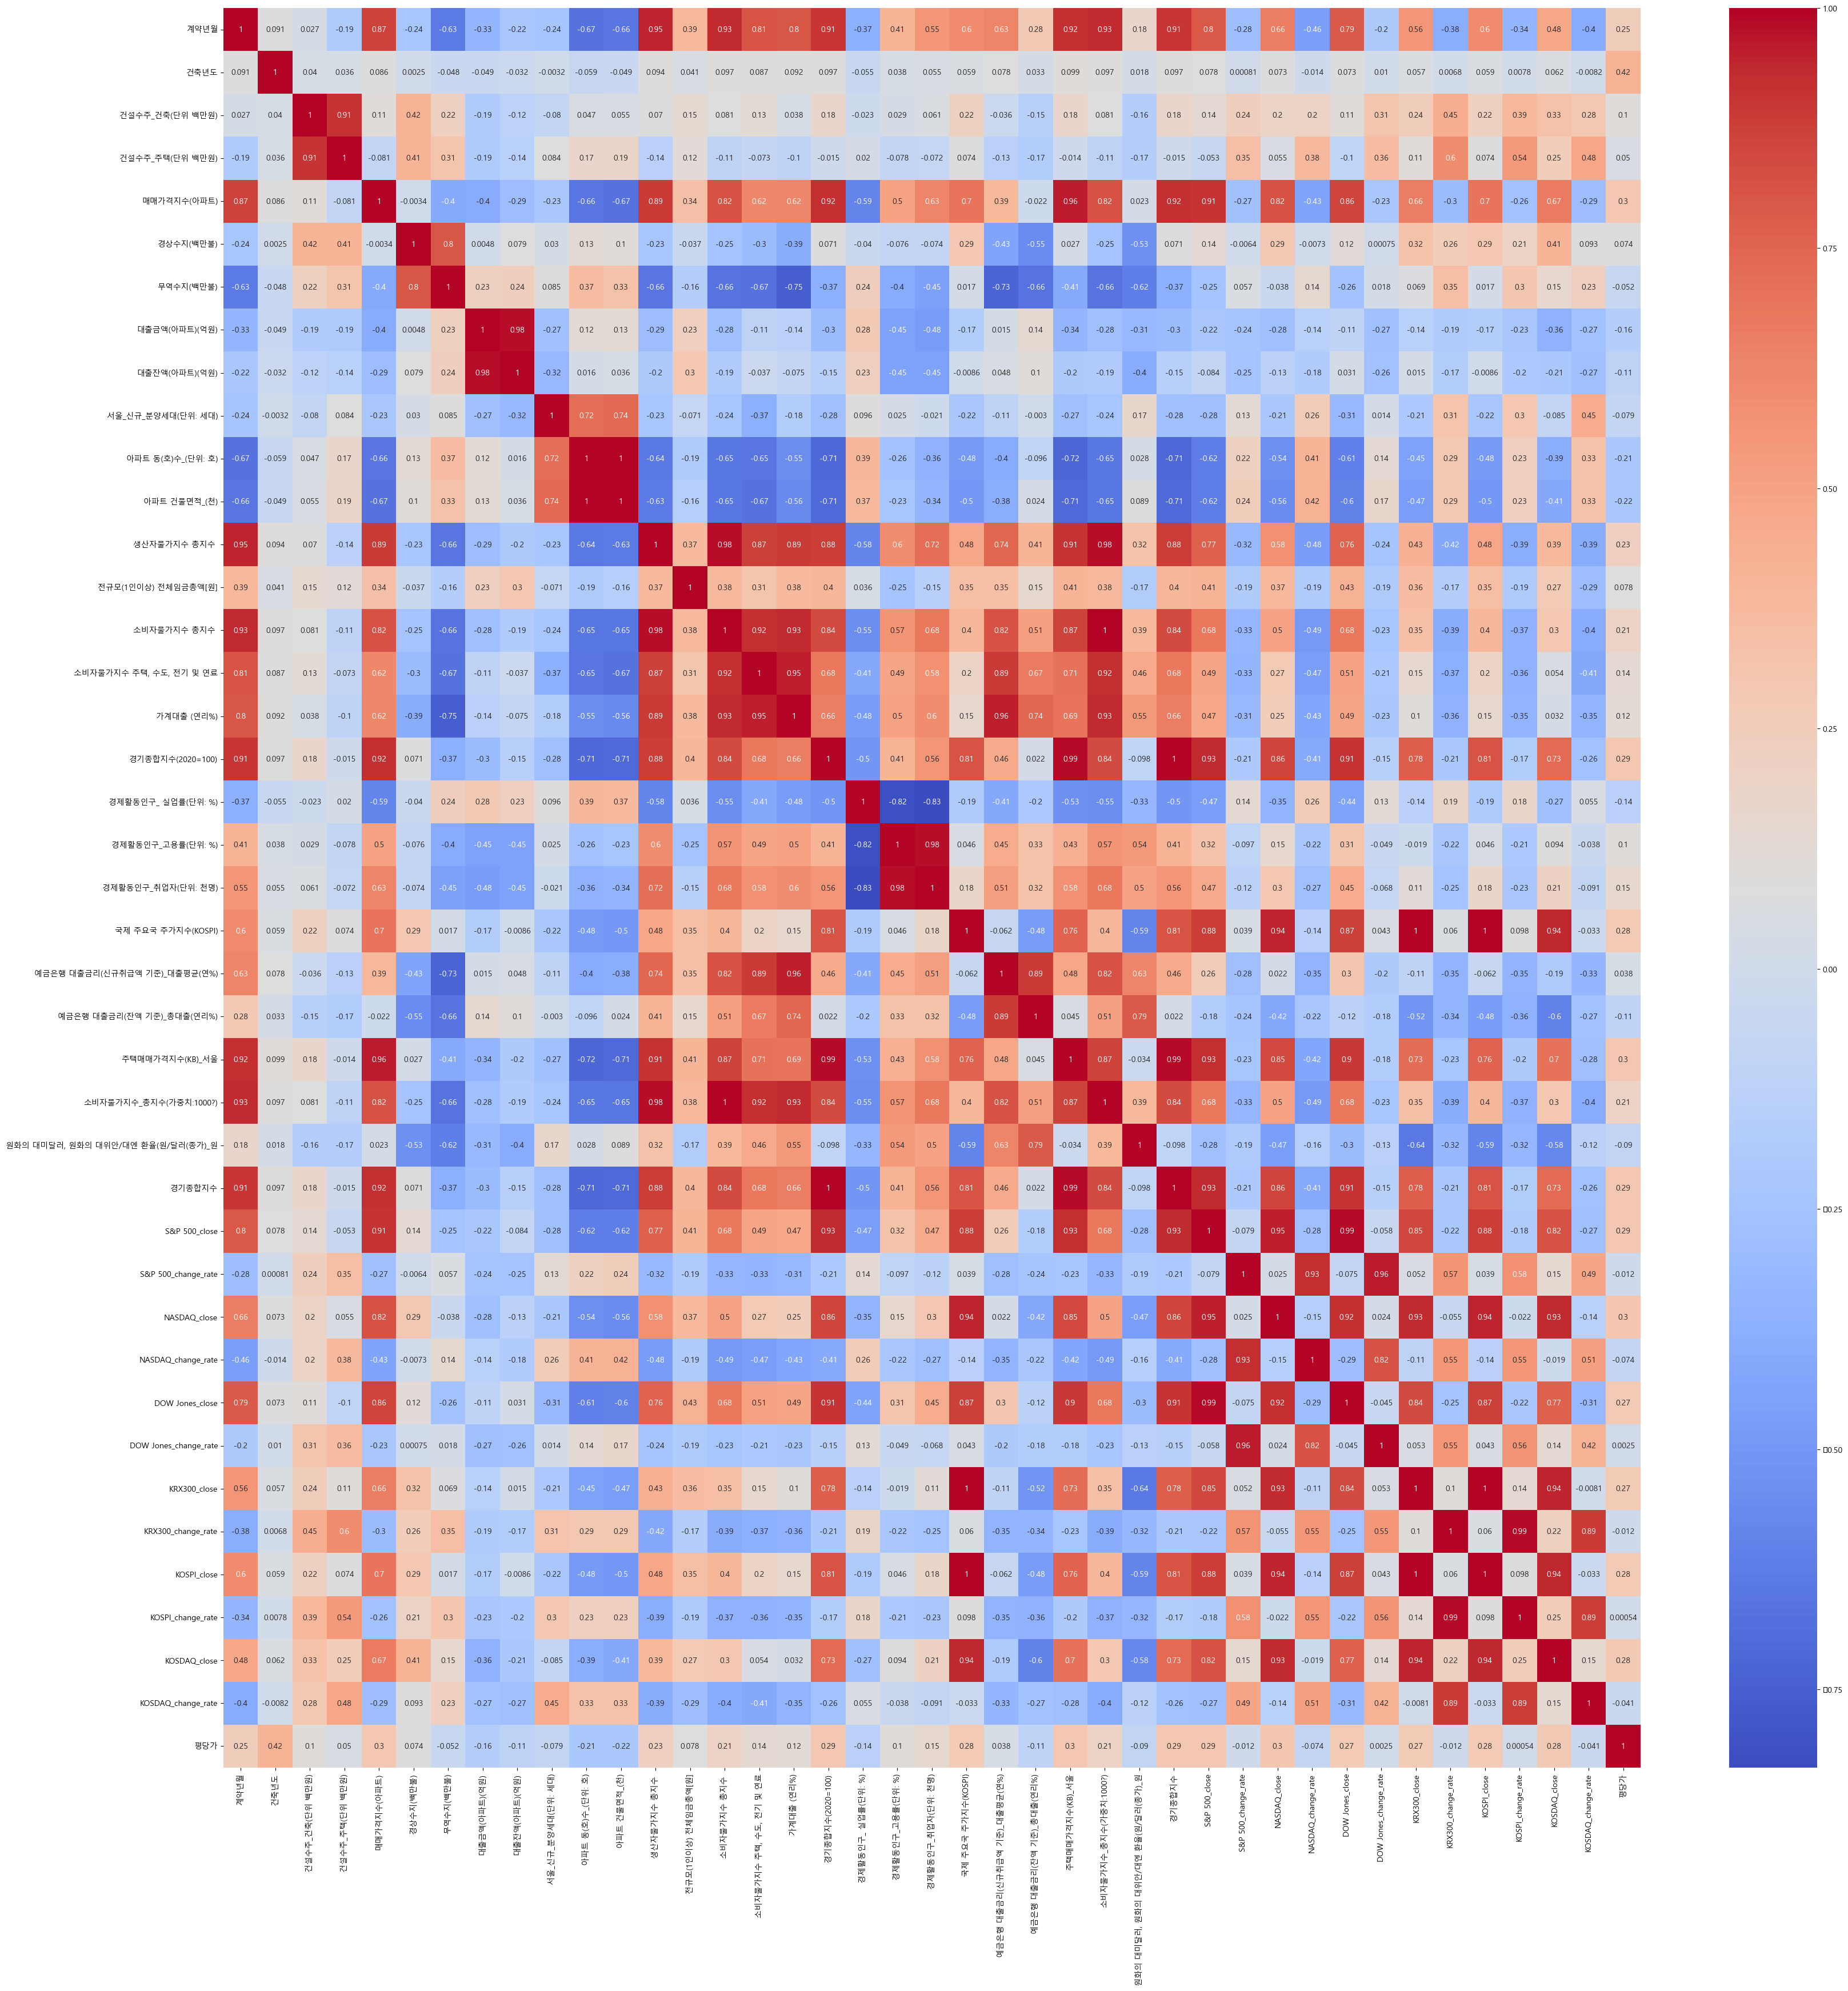

In [27]:
plt.figure(figsize=(40,40))
sns.heatmap(heatmap_data.corr(), annot=True, cmap="coolwarm")

#VIF를 통한 다중공선성 측정

In [28]:
heatmap_data.isnull().sum()

계약년월                                    0
건축년도                                    0
건설수주_건축(단위 백만원)                         0
건설수주_주택(단위 백만원)                         0
매매가격지수(아파트)                             0
경상수지(백만불)                               0
무역수지(백만불)                               0
대출금액(아파트)(억원)                           0
대출잔액(아파트)(억원)                           0
서울_신규_분양세대(단위: 세대)                      0
아파트 동(호)수_(단위: 호)                       0
아파트 건물면적_(천)                          106
생산자물가지수 총지수                             0
전규모(1인이상) 전체임금총액[원]                     0
소비자물가지수 총지수                             0
소비자물가지수 주택, 수도, 전기 및 연료                 0
가계대출 (연리%)                              0
경기종합지수(2020=100)                        0
경제활동인구_ 실업률(단위: %)                      0
경제활동인구_고용률(단위: %)                       0
경제활동인구_취업자(단위: 천명)                      0
국제 주요국 주가지수(KOSPI)                      0
예금은행 대출금리(신규취급액 기준)_대출평균(연%)            0
예금은행 대출금리(잔액 기준)_총대출(연리%)         

In [29]:
heatmap_data = heatmap_data.dropna(subset=["아파트 건물면적_(천)"])

In [31]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

# VIF를 계산할 데이터프레임 (수치형 변수만 포함)
# 예를 들어, data가 분석할 데이터프레임이라고 가정
X = heatmap_data.select_dtypes(include=[np.number])

# VIF 계산
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

print(vif_data)


c:\Users\vivid\AppData\Local\Programs\Python\Python37\lib\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


                               feature           VIF
0                                 계약년월  1.588017e+05
1                                 건축년도  1.240282e+00
2                      건설수주_건축(단위 백만원)           inf
3                      건설수주_주택(단위 백만원)           inf
4                          매매가격지수(아파트)  1.756514e+04
5                            경상수지(백만불)  4.154059e+04
6                            무역수지(백만불)  2.966525e+06
7                        대출금액(아파트)(억원)  4.926823e+05
8                        대출잔액(아파트)(억원)  1.181418e+06
9                   서울_신규_분양세대(단위: 세대)  2.113884e+06
10                   아파트 동(호)수_(단위: 호)  3.403400e+06
11                        아파트 건물면적_(천)  3.399170e+06
12                        생산자물가지수 총지수   3.912945e+04
13                 전규모(1인이상) 전체임금총액[원]  2.898172e+04
14                        소비자물가지수 총지수   8.875538e+06
15             소비자물가지수 주택, 수도, 전기 및 연료           inf
16                          가계대출 (연리%)  1.180800e+06
17                    경기종합지수(2020=100)  1.7983